In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import f1_score, classification_report, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv(r'framingham.csv')
data.drop(['education'], axis = 1, inplace = True)

In [3]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
data.isnull().any()

male               False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [6]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('These', count, 'rows are excluded from the dataset.')

Total number of rows with missing values is  489
These 489 rows are excluded from the dataset.


In [8]:
data.dropna(axis = 0, inplace = True)

In [9]:
data['TenYearCHD'].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

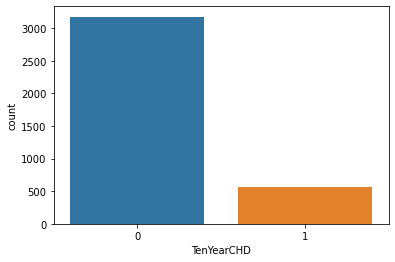

In [10]:
sns.countplot(x='TenYearCHD', data = data)

In [11]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<AxesSubplot:>

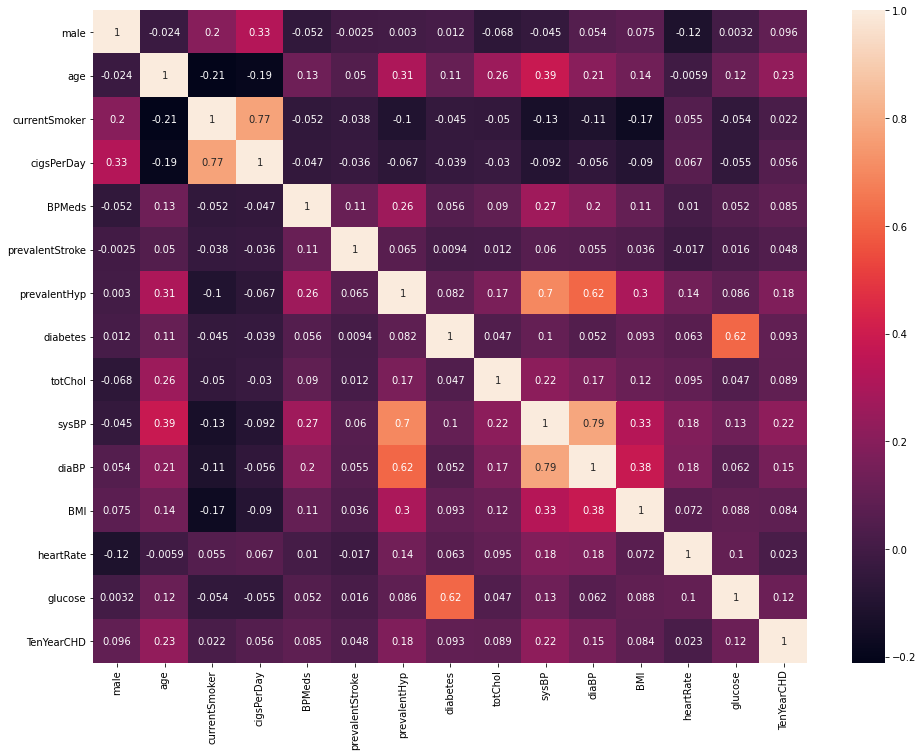

In [12]:
plt.figure(figsize = (16,12))
sns.heatmap(data.corr(), annot = True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X = data.drop('TenYearCHD', axis = 1)
Y = data['TenYearCHD']

In [15]:
scaler.fit(X)
scaled_ds = pd.DataFrame(scaler.transform(X), columns= X.columns )
scaled_ds.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.116358,-1.234664,-0.977057,-0.755427,-0.177093,-0.075054,-0.673128,-0.167237,-0.940551,-1.195789,-1.083977,0.285424,0.359319,-0.204446
1,-0.895770,-0.417687,-0.977057,-0.755427,-0.177093,-0.075054,-0.673128,-0.167237,0.292509,-0.515486,-0.162065,0.718351,1.613902,-0.246314
2,1.116358,-0.184266,1.023482,0.922305,-0.177093,-0.075054,-0.673128,-0.167237,0.180413,-0.220689,-0.245875,-0.115525,-0.058875,-0.497519
3,-0.895770,1.332976,1.023482,1.761172,-0.177093,-0.075054,1.485602,-0.167237,-0.267973,0.799765,1.011277,0.681454,-0.895264,0.884110
4,-0.895770,-0.417687,1.023482,1.173965,-0.177093,-0.075054,-0.673128,-0.167237,1.077184,-0.107305,0.089365,-0.666523,0.777513,0.130494


In [16]:
scaled_ds = scaled_ds - scaled_ds.mean()/scaled_ds.std()

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_ds,Y)

In [18]:
xtrain.shape

(2811, 14)

In [19]:
sample = SMOTE()

In [20]:
x,y = sample.fit_resample(scaled_ds,Y)

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

<AxesSubplot:>

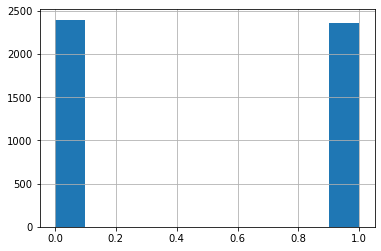

In [22]:
ytrain.hist()

# Logistic Regression

In [23]:
para = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none','l1','l2','elasticnet'],
    'C': [100,10,1.0,0.1,0.01]
}

In [24]:
best = GridSearchCV(LogisticRegression(),para)
best.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [25]:
best.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [26]:
LogReg = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
LogReg.fit(xtrain,ytrain)
ypred1 = LogReg.predict_proba(xtest)
ypred = binarize(ypred1, threshold=0.4)[:,1]

n_outliers = len(X)
n_errors = (ypred != ytest).sum()

acc = accuracy_score(ytest, ypred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(ytest, ypred)
print("The precision is {}".format(prec))
  
rec = recall_score(ytest, ypred)
print("The recall is {}".format(rec))
  
f1 = f1_score(ytest, ypred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.6821900566393958
The precision is 0.6494140625
The recall is 0.8199753390875463
The F1-Score is 0.7247956403269754


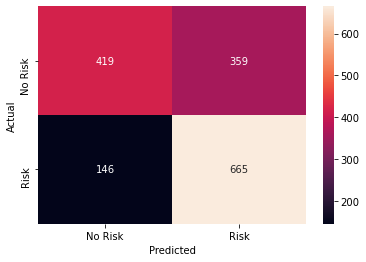

In [27]:
mat=confusion_matrix(ytest, ypred)
sns.heatmap(mat, annot = True,fmt = 'd', xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       778
           1       0.65      0.82      0.72       811

    accuracy                           0.68      1589
   macro avg       0.70      0.68      0.67      1589
weighted avg       0.69      0.68      0.68      1589



# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

In [30]:
acc = accuracy_score(ytest, ypred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(ytest, ypred)
print("The precision is {}".format(prec))
  
rec = recall_score(ytest, ypred)
print("The recall is {}".format(rec))
  
f1 = f1_score(ytest, ypred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.881686595342983
The precision is 0.8677685950413223
The recall is 0.906288532675709
The F1-Score is 0.8866103739445115


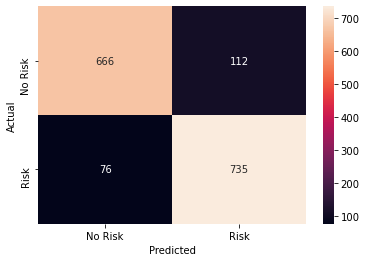

In [31]:
mat=confusion_matrix(ytest, ypred)
sns.heatmap(mat, annot = True,fmt = 'd', xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model3 = DecisionTreeClassifier(criterion='gini')
model3.fit(xtrain,ytrain)
ypred = model3.predict(xtest)

In [34]:
acc = accuracy_score(ytest, ypred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(ytest, ypred)
print("The precision is {}".format(prec))
  
rec = recall_score(ytest, ypred)
print("The recall is {}".format(rec))
  
f1 = f1_score(ytest, ypred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.8005034612964128
The precision is 0.7813211845102506
The recall is 0.8458692971639951
The F1-Score is 0.8123149792776792


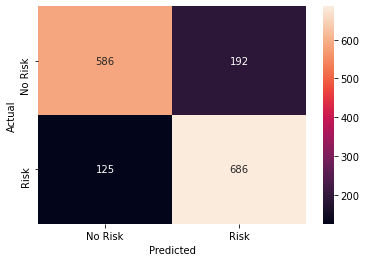

In [35]:
mat=confusion_matrix(ytest, ypred)
sns.heatmap(mat, annot = True,fmt = 'd', xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import BernoulliNB

In [37]:
model3 = BernoulliNB(binarize=0.05)
model3.fit(xtrain,ytrain)
ypred = model3.predict(xtest)

In [38]:
acc = accuracy_score(ytest, ypred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(ytest, ypred)
print("The precision is {}".format(prec))
  
rec = recall_score(ytest, ypred)
print("The recall is {}".format(rec))
  
f1 = f1_score(ytest, ypred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.6463184392699811
The precision is 0.6623207301173403
The recall is 0.6263871763255241
The F1-Score is 0.6438529784537389


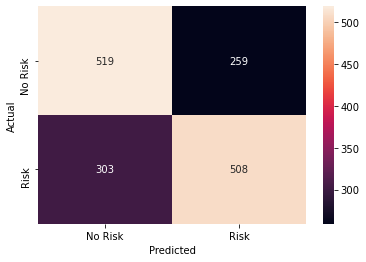

In [39]:
mat=confusion_matrix(ytest, ypred)
sns.heatmap(mat, annot = True,fmt = 'd', xticklabels=["No Risk", "Risk"], yticklabels=["No Risk", "Risk"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()